In [ ]:
#Angle of incidence test.
#In this file the assertion from the papaer that the micro dome structure slightly imporves transmiison
#when the (sun) light source is under an angle is tested

In [ ]:
#First for the flat foil the function below allows you to place the observing plane under an angle

In [6]:
def b_plane_scene(foil_width, foil_material, foil_thickness = 75, samples = 10**7, alpha = 2, beta = 0):
    #Here beta is the angle between the light souce and the normal vector to the plane
    #See page 38 notebook
    
    import matplotlib.pyplot as plt
    from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
    from raysect.optical.observer import PinholeCamera
    from raysect.optical.material import UniformSurfaceEmitter, Lambert
    from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
    from raysect.core import rotate_x, rotate_y, rotate_z
    from numpy import tan, pi, arctan
    from raysect.optical.library import schott
    import numpy as np
    
    #Imports for power measurement
    from raysect.optical.observer import Pixel, PowerPipeline0D #Pixel comes from: source/raysect/optical/observer/nonimaging
    
    #import from mat_functions
    import import_ipynb                  #Function required to do imports from jupyter notebook files 
    from mat_functions import mat_materials
    perfect_reflector = mat_materials.perfect_mirror()
    perfect_absorber = mat_materials.perfect_absorber()
    world = World()
    
    #Light source
    #Calculating the distance to the source. 
    r_source = 6.9634*10**8   #Radius of the light source (made significantly bigger than the foil to simulate reality)
    d_source = np.tan((90-alpha)*np.pi/180)*(foil_width/2**0.5+r_source) #This equation is based on the image on page 32 
    x_source = d_source*np.sin(beta/180*np.pi)
    y_source = d_source*np.cos(beta/180*np.pi)
    
    source_material = UniformSurfaceEmitter(d65_white, 1)
    light_source = Sphere(r_source, transform=translate(x_source, y_source, 0),parent = world,material = source_material)
    
    
    # Creating the foil
    foil = Box(Point3D(-foil_width/2,-foil_thickness,-foil_width/2),Point3D(foil_width/2,0,foil_width/2),
               parent=world,material=foil_material)
    
    #Adding the mirror edges
    mirror_1 = Box(Point3D(-foil_width/2 - 1, -foil_thickness-1, -foil_width/2),
                      Point3D(-foil_width/2, 0, foil_width/2),
                      parent=world, material = perfect_reflector)
    mirror_2 = Box(Point3D(foil_width/2, -foil_thickness-1, -foil_width/2),
                       Point3D(foil_width/2 + 1, 0, foil_width/2),
                       parent=world, material = perfect_reflector)
    mirror_3 = Box(Point3D(-foil_width/2, -foil_thickness-1, foil_width/2),
                       Point3D(foil_width/2, 0, foil_width/2 + 1),
                       parent=world, material = perfect_reflector)
    mirror_4 = Box(Point3D(-foil_width/2, -foil_thickness-1, -foil_width/2 - 1),
                      Point3D(foil_width/2, 0, -foil_width/2),
                      parent=world, material = perfect_reflector)
    
    #Placing an absorbtion block underneed
    absorbing_block = Box(Point3D(-foil_width, -foil_thickness-10, -foil_width),
                      Point3D(foil_width, -foil_thickness-1, -foil_width),
                      parent=world, material = perfect_absorber)
    
    #Now placing the observing plane instead of the camera
    power = PowerPipeline0D(accumulate=False)
    observing_plane = Pixel(
        [power], 
        x_width = foil_width, y_width = foil_width,  # Size of the observing plane
        #min_wavelength=min_wl, max_wavelength=max_wl,  # Wavelength range to observe
        spectral_bins=1,  # Number of wavelength bins
        pixel_samples=samples,  # Number of samples to use
        parent=world, 
        transform= rotate_x(-90) * translate(0, 0, -foil_thickness-0.01)  # Position the observer
        , quiet = True  )
    #Perform observation
    observing_plane.observe()
    measured_power = round(power.value.mean)
    measured_error = round(power.value.error())
    
    return measured_power, measured_error

In [ ]:
#Same for the microdomes

In [7]:
def b_micro_dome_scene(foil_width, foil_material, foil_thickness = 75, samples = 10**7, alpha = 2, beta = 0):
    #Here beta is the angle between the light souce and the normal vector to the plane
    #See page 38 notebook
    
    import matplotlib.pyplot as plt
    from raysect.optical import World, translate, rotate, Point3D, d65_white, ConstantSF
    from raysect.optical.observer import PinholeCamera
    from raysect.optical.material import UniformSurfaceEmitter, Lambert
    from raysect.primitive import Sphere, Box, Cylinder, Intersect, Union, Subtract
    from raysect.core import rotate_x, rotate_y, rotate_z
    from numpy import tan, pi, arctan
    from raysect.optical.library import schott
    import numpy as np
    
    #Imports for power measurement
    from raysect.optical.observer import Pixel, PowerPipeline0D #Pixel comes from: source/raysect/optical/observer/nonimaging
    
    #import from mat_functions
    import import_ipynb                  #Function required to do imports from jupyter notebook files 
    from mat_functions import mat_materials, Microarrays
    perfect_reflector = mat_materials.perfect_mirror()
    perfect_absorber = mat_materials.perfect_absorber()
    world = World()
    
    #Light source
    #Calculating the distance to the source. 
    r_source = 6.9634*10**8   #Radius of the light source (made significantly bigger than the foil to simulate reality)
    d_source = np.tan((90-alpha)*np.pi/180)*(foil_width/2**0.5+r_source) #This equation is based on the image on page 32 
    x_source = d_source*np.sin(beta/180*np.pi)
    y_source = d_source*np.cos(beta/180*np.pi)
    
    source_material = UniformSurfaceEmitter(d65_white, 1)
    light_source = Sphere(r_source, transform=translate(x_source, y_source, 0),parent = world,material = source_material)
    
    
    # Creating the foil
    height = foil_width/400*65
    foil = Microarrays.micro_dome_array(foil_width, height, foil_thickness, 1, foil_material, world)
    
    #Adding the mirror edges
    mirror_1 = Box(Point3D(-foil_width/2 - 1, -foil_thickness-1, -foil_width/2),
                      Point3D(-foil_width/2, 0, foil_width/2),
                      parent=world, material = perfect_reflector)
    mirror_2 = Box(Point3D(foil_width/2, -foil_thickness-1, -foil_width/2),
                       Point3D(foil_width/2 + 1, 0, foil_width/2),
                       parent=world, material = perfect_reflector)
    mirror_3 = Box(Point3D(-foil_width/2, -foil_thickness-1, foil_width/2),
                       Point3D(foil_width/2, 0, foil_width/2 + 1),
                       parent=world, material = perfect_reflector)
    mirror_4 = Box(Point3D(-foil_width/2, -foil_thickness-1, -foil_width/2 - 1),
                      Point3D(foil_width/2, 0, -foil_width/2),
                      parent=world, material = perfect_reflector)
    
    #Placing an absorbtion block underneed
    absorbing_block = Box(Point3D(-foil_width, -foil_thickness-10, -foil_width),
                      Point3D(foil_width, -foil_thickness-1, -foil_width),
                      parent=world, material = perfect_absorber)
    
    #Now placing the observing plane instead of the camera
    power = PowerPipeline0D(accumulate=False)
    observing_plane = Pixel(
        [power], 
        x_width = foil_width, y_width = foil_width,  # Size of the observing plane
        #min_wavelength=min_wl, max_wavelength=max_wl,  # Wavelength range to observe
        spectral_bins=1,  # Number of wavelength bins
        pixel_samples=samples,  # Number of samples to use
        parent=world, 
        transform= rotate_x(-90) * translate(0, 0, -foil_thickness-0.01)  # Position the observer
        , quiet = True  )
    #Perform observation
    observing_plane.observe()
    measured_power = round(power.value.mean)
    measured_error = round(power.value.error())
    
    return measured_power, measured_error

In [ ]:
#Comparing the flat plane and the micro dome scene between 0 and 90 degrees
# for foil_materiaal = mat_materials.constant_n_glass(1.5)

In [11]:
#Gattering the data
import numpy as np
import import_ipynb                  #Function required to do imports from jupyter notebook files 
from mat_functions import mat_materials, Microarrays
w = 400
foil_materiaal = mat_materials.constant_n_glass(1.5)
print('foil_materiaal' = foil_materiaal)
betas = np.arange(0,95,5)

beta_plane_powers = []
beta_plane_errors = []

beta_micro_dome_powers = []
beta_micro_dome_errors = []

for b in betas:
    print('Beta =',b)
    P_plane, E_plane = b_plane_scene(w, foil_material = foil_materiaal, samples = 10**6, beta = b)
    beta_plane_powers.append(P_plane)
    beta_plane_errors.append(E_plane)
    
    P_md, E_md = b_micro_dome_scene(w, foil_material = foil_materiaal, samples = 10**6, beta = b)
    beta_micro_dome_powers.append(P_md)
    beta_micro_dome_errors.append(E_md)

print('done')

Beta = 0
Beta = 5
Beta = 10
Beta = 15
Beta = 20
Beta = 25
Beta = 30
Beta = 35
Beta = 40
Beta = 45
Beta = 50
Beta = 55
Beta = 60
Beta = 65
Beta = 70
Beta = 75
Beta = 80
Beta = 85
Beta = 90
done


In [12]:
#Printing the raw data
print('beta_plane_powers',beta_plane_powers)
print('beta_plane_errors',beta_plane_errors)
print('beta_micro_dome_powers',beta_micro_dome_powers)
print('beta_micro_dome_errors',beta_micro_dome_errors)

beta_plane_powers [202998, 212142, 213893, 200990, 190743, 192840, 189445, 170824, 161916, 154322, 130566, 111879, 97107, 80350, 58287, 34889, 17781, 4639, 1711]
beta_plane_errors [6208, 6347, 6373, 6179, 6020, 6053, 6000, 5698, 5548, 5417, 4983, 4612, 4299, 3911, 3332, 2579, 1844, 947, 570]
beta_micro_dome_powers [212742, 216365, 207608, 204269, 192673, 194007, 194257, 177708, 152713, 130342, 109945, 77917, 58349, 35796, 19885, 11563, 7255, 4535, 4625]
beta_micro_dome_errors [6356, 6410, 6279, 6230, 6051, 6072, 6082, 5812, 5391, 4984, 4576, 3859, 3341, 2618, 1962, 1494, 1195, 947, 969]


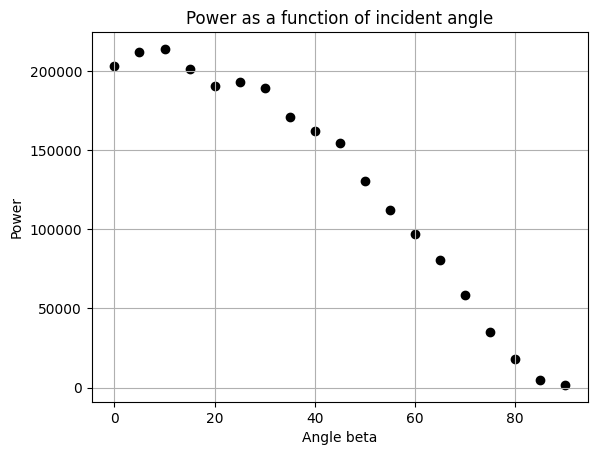

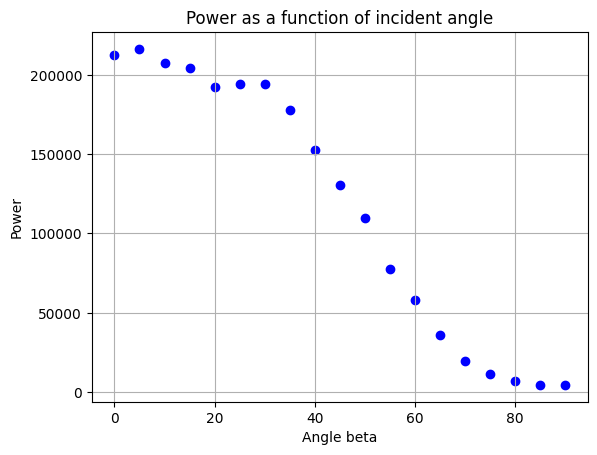

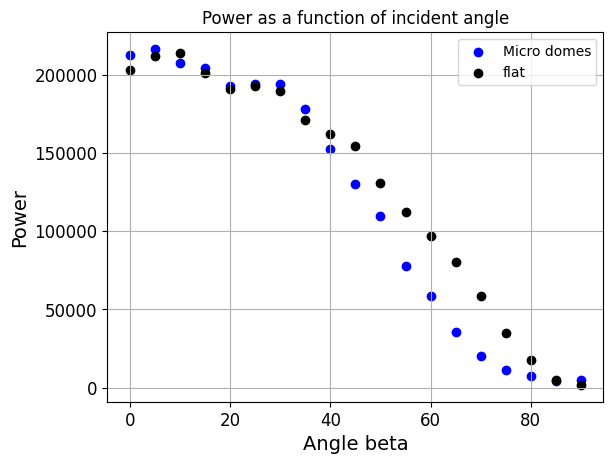

In [13]:
#Making the plots
import matplotlib.pyplot as plt
plt.figure(1)
plt.grid()
plt.xlabel('Angle beta')
plt.ylabel('Power')
plt.title('Power as a function of incident angle')
plt.scatter(betas,beta_plane_powers,color = 'black')
plt.show()

plt.figure(2)
plt.grid()
plt.xlabel('Angle beta')
plt.ylabel('Power')
plt.title('Power as a function of incident angle')
plt.scatter(betas,beta_micro_dome_powers,color = 'blue')
plt.show()

#Plotting the micro domes and planer foil together
plt.figure(3)
plt.grid()
plt.xlabel('Angle beta',fontsize = 14)
plt.ylabel('Power',fontsize = 14)
plt.title('Power as a function of incident angle')
plt.scatter(betas,beta_micro_dome_powers,color = 'blue',label = 'Micro domes')
plt.scatter(betas,beta_plane_powers,color = 'black', label = 'flat')
plt.legend
plt.xticks(fontsize=12)  # Set the font size for the x-axis numbers
plt.yticks(fontsize=12)  # Set the font size for the y-axis numbers
plt.legend()
plt.show()

In [ ]:
#Doing the same test for a different type of glass (to test if something is wrong with my glass)


In [16]:
#Gattering the data
import numpy as np
import import_ipynb                  #Function required to do imports from jupyter notebook files 
from mat_functions import mat_materials, Microarrays
from raysect.optical.library import schott
w = 400
foil_materiaal = schott("N-BK7")
print('foil_materiaal' , foil_materiaal)
betas = np.arange(0,95,5)

beta_plane_powers_dg = [] #dg stands for different glass
beta_plane_errors_dg = []

beta_micro_dome_powers_dg = []
beta_micro_dome_errors_dg = []

for b in betas:
    print('Beta =',b)
    P_plane_dg, E_plane_dg = b_plane_scene(w, foil_material = foil_materiaal, samples = 10**6, beta = b)
    beta_plane_powers_dg.append(P_plane_dg)
    beta_plane_errors_dg.append(E_plane_dg)
    
    P_md_dg, E_md_dg = b_micro_dome_scene(w, foil_material = foil_materiaal, samples = 10**6, beta = b)
    beta_micro_dome_powers_dg.append(P_md_dg)
    beta_micro_dome_errors_dg.append(E_md_dg)

print('done')

foil_materiaal <raysect.optical.material.dielectric.Dielectric object at 0x7fc95814f160>
Beta = 0
Beta = 5
Beta = 10
Beta = 15
Beta = 20
Beta = 25
Beta = 30
Beta = 35
Beta = 40
Beta = 45
Beta = 50
Beta = 55
Beta = 60
Beta = 65
Beta = 70
Beta = 75
Beta = 80
Beta = 85
Beta = 90
done


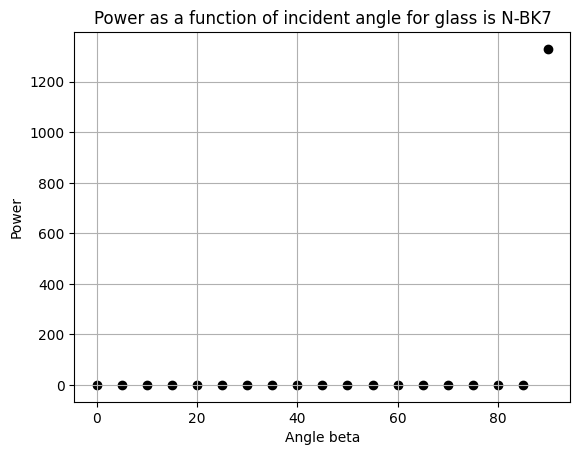

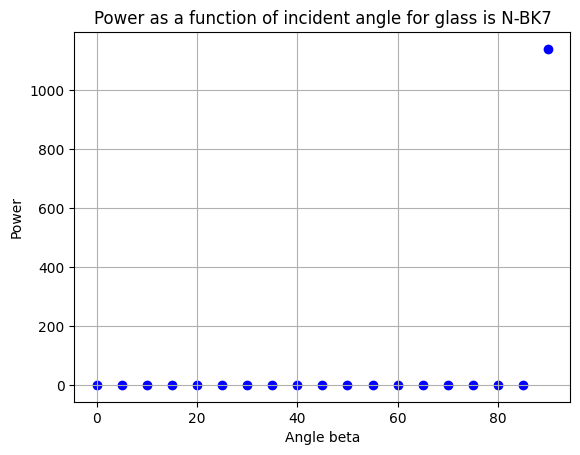

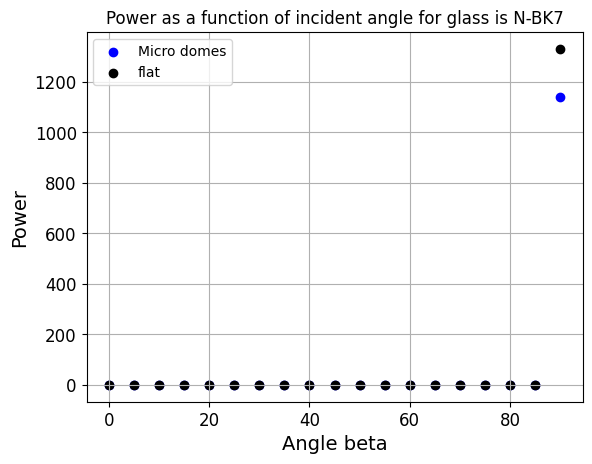

In [17]:
#Making the plots
import matplotlib.pyplot as plt
plt.figure(1)
plt.grid()
plt.xlabel('Angle beta')
plt.ylabel('Power')
plt.title('Power as a function of incident angle for glass is N-BK7')
plt.scatter(betas,beta_plane_powers_dg,color = 'black')
plt.show()

plt.figure(2)
plt.grid()
plt.xlabel('Angle beta')
plt.ylabel('Power')
plt.title('Power as a function of incident angle for glass is N-BK7')
plt.scatter(betas,beta_micro_dome_powers_dg,color = 'blue')
plt.show()

#Plotting the micro domes and planer foil together
plt.figure(3)
plt.grid()
plt.xlabel('Angle beta',fontsize = 14)
plt.ylabel('Power',fontsize = 14)
plt.title('Power as a function of incident angle for glass is N-BK7')
plt.scatter(betas,beta_micro_dome_powers_dg,color = 'blue',label = 'Micro domes')
plt.scatter(betas,beta_plane_powers_dg,color = 'black', label = 'flat')
plt.legend
plt.xticks(fontsize=12)  # Set the font size for the x-axis numbers
plt.yticks(fontsize=12)  # Set the font size for the y-axis numbers
plt.legend()
plt.show()